# MOwNiT 
## Laboratorium 4

### Tablice wielowymiarowe i mnożenie macierzy w Julii

In [1]:
#tablice wielowymiarowe w Julii
Asmall=[[1.0 0.0]; [0.0 1.0]]
Bsmall=Asmall
#size(B,1)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [2]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

naive_multiplication (generic function with 1 method)

In [3]:
#kompilacja
naive_multiplication(Asmall,Bsmall)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [4]:
#kompilacja funkcji BLASowej do mnożenia macierzy
#https://docs.julialang.org/en/stable/stdlib/linalg/#BLAS-Functions-1
Asmall*Bsmall

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [5]:
A=rand(1000,1000);
B=rand(1000,1000);

In [6]:
# Należy pamiętać o "column-major" dostępie do tablic - 
# pierwszy indeks zmienia się szybciej
# tak jak Matlab, R, Fortran 
# inaczej niz C, Python
A1 = [[1 2]; [3 4]]
vec(A1)

4-element Array{Int64,1}:
 1
 3
 2
 4

In [7]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
#można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end


better_multiplication (generic function with 1 method)

In [8]:
better_multiplication(Asmall, Bsmall)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [9]:
@elapsed naive_multiplication(A,B)

3.699477501

In [10]:
@elapsed better_multiplication(A,B)

2.1304201

In [11]:
@elapsed A*B

0.0374785

### Wielomiany i aproksymacja średniokwadratowa

In [12]:
# aproksymacja sredniokwadratowa wielomianem - tutaj przyklad dla wielomianu 3 stopnia
# pakiet Polynomials jest mozliwy do instalacji pod Juliabox
# https://github.com/JuliaMath/Polynomials.jl
# using Pkg
# Pkg.add("Polynomials")

using Polynomials

# tworzę punkty do aproksymacji (tutaj jako przykład wyliczone wartości funkcji e^x)
xs = 0:10; ys = map(x->exp(x), xs)

#dopasowuje wielomian trzeciego stopnia do danych
fit_poly_3=fit(xs, ys,3)

Polynomial(-1086.8658708490193 + 2905.5721994684577*x - 1082.745723874463*x^2 + 100.44658880845408*x^3)

In [13]:
# obliczanie wartosci wielomianu 
fit_poly_3(1)

836.4071935534294

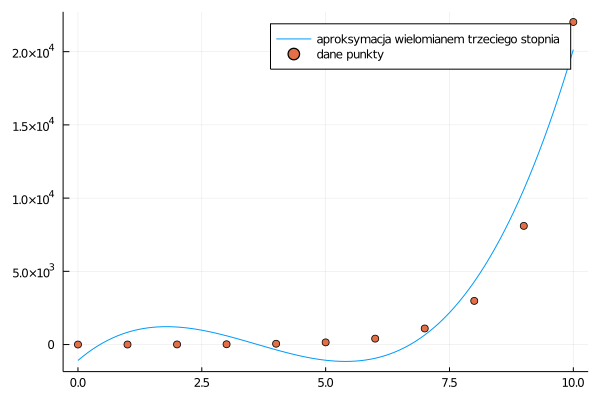

In [14]:
using Plots
plot(fit_poly_3,  extrema(xs)..., label="aproksymacja wielomianem trzeciego stopnia")
# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs,ys,label ="dane punkty")


### Wielomiany Czebyszewa w pakiecie Polynomials

In [15]:
# podajemy tablicę współczynników, gdzie wielomiany Czebyszewa są wielomianami bazowymi np dla T2(x)
t2=ChebyshevT([0,0,1])

ChebyshevT(1⋅T_2(x))

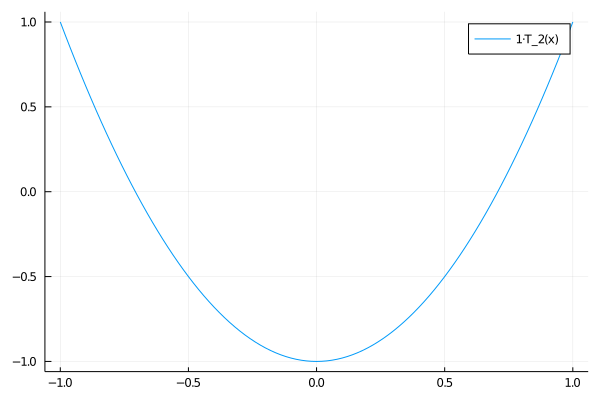

In [16]:
plot(t2)

In [17]:
#zera wielomianu Czebyszewa T2
Polynomials.roots(t2)

2-element Array{Float64,1}:
 -0.7071067811865475
  0.7071067811865476

In [18]:
#konwersja 
convert(Polynomial, t2)

Polynomial(-1.0 + 2.0*x^2)

In [19]:
#można tworzyć kombinacje liniowe w bazie wielomianów Czebyszewa
kombinacja_T=ChebyshevT([3,2,1])

ChebyshevT(3⋅T_0(x) + 2⋅T_1(x) + 1⋅T_2(x))

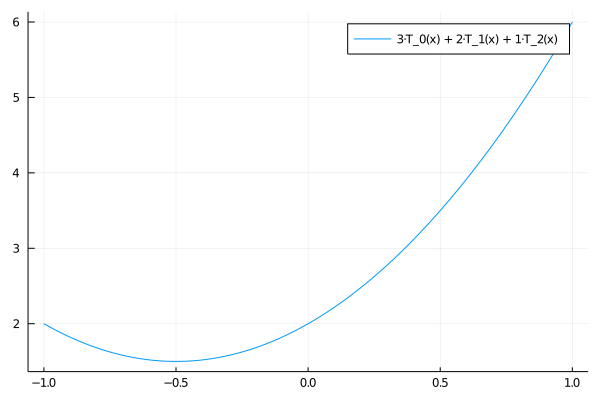

In [20]:
plot(kombinacja_T)

Skąd się wzieło polynomials logo :-)
https://juliamath.github.io/Polynomials.jl/stable/reference/#Example:-The-Polynomials.jl-logo-1

## Aproksymacja jednostajna Taylora i Pade

In [21]:
#pakiet do rozwijania w szereg Taylora
# using Pkg; Pkg.add("TaylorSeries")
using TaylorSeries

In [22]:
# Definiujemy, ile pierwszych wyrazów szeregu Taylora nas interesuje
t = Taylor1(Float64, 5)

 1.0 t + 𝒪(t⁶)

In [23]:
# Przykładowa funkcja, którą będziemy aproksymować jednostajnie
myfun(x)=exp(x)

myfun (generic function with 1 method)

In [24]:
#Rozwinięcie Taylora 
p=myfun(t)

 1.0 + 1.0 t + 0.5 t² + 0.16666666666666666 t³ + 0.041666666666666664 t⁴ + 0.008333333333333333 t⁵ + 𝒪(t⁶)

In [25]:
# Julia hint - jak zapytać o pola typu danych
fieldnames(typeof(p))

(:coeffs, :order)

In [26]:
# mogę wyciągnąć ze struktury typu  odpowiednie pole
p.coeffs

6-element Array{Float64,1}:
 1.0
 1.0
 0.5
 0.16666666666666666
 0.041666666666666664
 0.008333333333333333

In [27]:
#Z przybliżenia Taylora tworzę wielomian zrozumiały dla pakietu Polynomials (typ Polynomial)
using Polynomials
p=Polynomial(p.coeffs)

Polynomial(1.0 + 1.0*x + 0.5*x^2 + 0.16666666666666666*x^3 + 0.041666666666666664*x^4 + 0.008333333333333333*x^5)

In [28]:
# mogę zamienić przybliżenie Taylora na aproksymację Pade (np. dla n=2, m=2)
pade=Polynomials.PolyCompat.PadeApproximation.Pade(p, 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64,Float64}(Polynomial(1.0 + 0.5000000000000001*x + 0.08333333333333333*x^2), Polynomial(1.0 - 0.5*x + 0.08333333333333333*x^2), :x)

### Zadania
 
1. Uruchomić 
   - naive_multiplication(A,B), 
   - better_multiplication(A,B) 
   - mnożenie BLAS w Julii (A*B) 

    dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie. (1pkt)
 
 
2. Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną za pomocą zamiany pętli metodę mnożenia macierzy(wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1.(osobno niż p.1). (Dla chętnych) sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu. (1 pkt)


3. Użyć funkcji polyfit  z pakietu  Polynomials   do znalezienia odpowiednich wielomianow, ktore najlepiej pasują do zależności czasowych kazdego z algorytmow. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianow do wczesniejszych  wykresów. (1 pkt)

4. Pokazać zniwelowanie efektu Rungego  poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Wymagany wykres. (1 pkt)

5. Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ (1 pkt)


## Zad 1.

Uruchomić 
   - naive_multiplication(A,B), 
   - better_multiplication(A,B) 
   - mnożenie BLAS w Julii (A*B) 

    dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie. (1pkt)

In [29]:
using DataFrames
res = DataFrame(size = Int64[], i = Int64[], naive = Float64[], better = Float64[], BLAS = Float64[])

for size in 50:30:400
    A=rand(size,size);
    B=rand(size,size);
    
    # initial
    naive_multiplication(A,B)
    better_multiplication(A,B)
    A*B
    
    for i in 1:1:10
        naive = @elapsed naive_multiplication(A,B)
        better = @elapsed better_multiplication(A,B)
        BLAS = @elapsed A*B
        push!(res, [size i naive better BLAS])
    end
end

In [30]:
using Statistics
res_grouped = combine(groupby(res, :size), "naive" => mean, "better" => mean, "BLAS" => mean,
                                           "naive" => std, "better" => std, "BLAS" => std)

,size,naive_mean,better_mean,BLAS_mean,naive_std,better_std,BLAS_std
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,50,0.00033118,0.00022597,2.792e-5,3.94773e-5,2.88163e-5,3.88763e-5
2,80,0.00144955,0.00100241,0.00023571,0.000112189,0.000251482,0.000150397
3,110,0.0038792,0.00249979,0.00028504,0.000238529,0.000368021,5.89859e-5
4,140,0.00835771,0.00505137,0.00048064,0.000814345,0.000411034,0.000498541
5,170,0.0154439,0.00901587,0.00066264,0.000993214,0.00117539,0.000669015
6,200,0.0245381,0.0149402,0.0005952,0.00102719,0.00123681,0.000178859
7,230,0.0371977,0.0211116,0.00060941,0.00153282,0.00119903,0.000217659
8,260,0.056061,0.0312745,0.00117993,0.0110328,0.0023124,0.00090746
9,290,0.080922,0.0479894,0.000956479,0.00628397,0.00477399,0.000154221


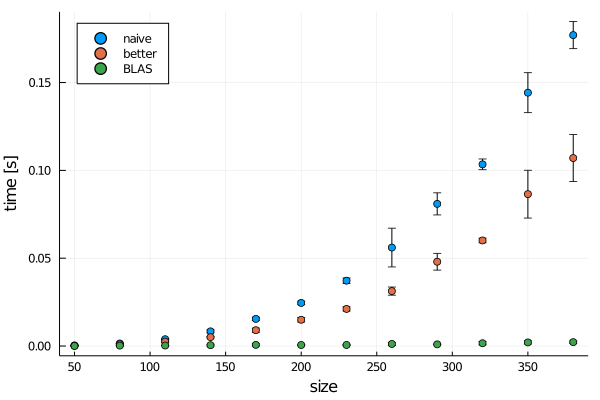

In [34]:
using Plots
scatter(res_grouped.size, res_grouped.naive_mean, yerr=res_grouped.naive_std, label = "naive", 
        xlabel = "size", ylabel = "time [s]", legend=:topleft)
scatter!(res_grouped.size, res_grouped.better_mean, yerr=res_grouped.better_std, label = "better")
scatter!(res_grouped.size, res_grouped.BLAS_mean, yerr=res_grouped.BLAS_std, label ="BLAS")

Zgodnie z przewidywaniami - metoda naiwna jest zdecydowanie najwolniejsza, zauważyć można wyraźną przewagę funkcji BLAS-owej.

Złożoność algorytmów mnożenia macierzy: $O(n^3)$

Najszybszy znany algorytm mnożenia macierzy ma złożoność rzęu $O(n^{2.3737})$   (Coppersmith–Winograd algorithm)

### Dopasowanie wielomianów (zad 3.)

In [35]:
xs = Float64.(res_grouped[!, :size])
ys_naive = res_grouped[!, :naive_mean]
ys_better = res_grouped[!, :better_mean]
ys_BLAS = res_grouped[!, :BLAS_mean]

12-element Array{Float64,1}:
 2.7919999999999997e-5
 0.00023571
 0.0002850396
 0.0004806395999999999
 0.0006626401
 0.0005951998999999999
 0.0006094098
 0.0011799299999999998
 0.0009564794999999999
 0.0015862
 0.0020594199
 0.00221156

In [36]:
f_naive = fit(xs,ys_naive,3)

Polynomial(0.002134483606885805 - 4.416636419070601e-5*x + 1.803021646172736e-7*x^2 + 3.055124617494992e-9*x^3)

In [37]:
f_better = fit(xs, ys_better,3)

Polynomial(-0.0008449264881656059 + 2.9722434703300867e-5*x - 2.6747842429998065e-7*x^2 + 2.486421361286178e-9*x^3)

In [38]:
f_BLAS = fit(xs, ys_BLAS,3)

Polynomial(-0.00030550613534572235 + 8.789154629012917e-6*x - 3.664028375945021e-8*x^2 + 8.365059426170509e-11*x^3)

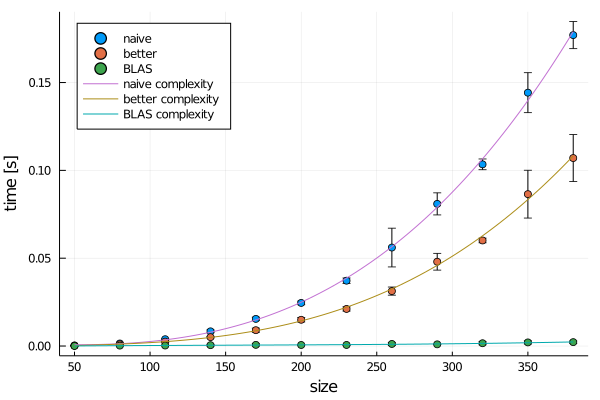

In [39]:
plot!(f_naive, extrema(xs)..., label = "naive complexity")
plot!(f_better, extrema(xs)..., label = "better complexity")
plot!(f_BLAS, extrema(xs)..., label = "BLAS complexity")

## Zad 2.

Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną za pomocą zamiany pętli metodę mnożenia macierzy(wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1.(osobno niż p.1). (Dla chętnych) sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu. (1 pkt)

##### Read only code
```c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <sys/times.h>
#include <unistd.h>
#include <gsl/gsl_blas.h>


void naive_multiplication(int** A, int** B, int n){
    int* matrix[n];
    for (int i = 0; i < n; i++){
        matrix[i] = calloc(n, sizeof(int*));
    }

    for (int i = 0; i < n; i++){
        for (int j = 0; j < n; j++){
            matrix[i][j] = 0;
        }
    }

    for (int k = 0; k < n; k++){
        for (int j = 0; j < n; j++){  //col
            for (int i = 0; i < n; i++){  //row
                matrix[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

void better_multiplication(int** A, int** B, int n){
    int* matrix[n];
    for (int i = 0; i < n; i++){
        matrix[i] = calloc(n, sizeof(int*));
    }

    for (int i = 0; i < n; i++){
        for (int j = 0; j < n; j++){
            matrix[i][j] = 0;
        }
    }

    for (int i = 0; i < n; i++){  //row
        for (int j = 0; j < n; j++){  //col
            for (int k = 0; k < n; k++){
                matrix[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}


void BLAS_multiplication(double* a, double* b, int size){

    double* c = malloc(sizeof(double) * size * size);
    for (int i = 0; i < size * size; i++){
        c[i] = i;
    }

    gsl_matrix_view A = gsl_matrix_view_array(a, size, size);
    gsl_matrix_view B = gsl_matrix_view_array(b, size, size);
    gsl_matrix_view C = gsl_matrix_view_array(c, size, size);

    // Compute C = A B

    gsl_blas_dgemm (CblasNoTrans, CblasNoTrans,
                    1.0, &A.matrix, &B.matrix,
                    0.0, &C.matrix);


}



int** build_matrix(int rows, int cols){
    int* values = calloc(rows * cols, sizeof(int));
    int**  r = malloc(cols * sizeof(int*));

    for (int i = 0; i < cols; ++i)
        r[i] = values + i * rows;

    for (int i = 0; i < rows; i++){
        for (int j = 0; j < cols; j++){
            r[i][j] = rand() % 20;
        }
    }
    return r;
}

double* build_matrix_BLAS(int size){
    double* m = malloc(sizeof(double) * size);
    for (int i = 0; i < size; i++){
        m[i] = i;
    }
    return m;
}

long double time_sec(clock_t time){
    return (long double)(time) / sysconf(_SC_CLK_TCK);
}

int main(){
    srand(time(NULL));

    struct tms start_tms;
    struct tms end_tms;
    clock_t clock_start;
    clock_t clock_end;


    int n;  // number of rows/cols of square matrix
    int** A;
    int** B;
    double * a;
    double * b;

    FILE* fd;
    fd = fopen("results_C.csv", "w+");

    for (n = 50; n < 500; n+=30) {
        for (int i = 0; i < 10; i++) {
            fprintf(fd, "%d,%d,", n, i);

            A = build_matrix(n, n);
            B = build_matrix(n, n);
            a = build_matrix_BLAS(n * n);
            b = build_matrix_BLAS(n * n);

            clock_start = times(&start_tms);
            naive_multiplication(A, B, n);
            clock_end = times(&end_tms);
            fprintf(fd, "%Lf,", time_sec(clock_end - clock_start));

            clock_start = times(&start_tms);
            better_multiplication(A, B, n);
            clock_end = times(&end_tms);
            fprintf(fd, "%Lf,", time_sec(clock_end - clock_start));

            clock_start = times(&start_tms);
            BLAS_multiplication(a, b, n);
            clock_end = times(&end_tms);
            fprintf(fd, "%Lf\n", time_sec(clock_end - clock_start));
        }
    }

    fclose(fd);
    
    return 0;
}

```

#### Output file: 
results_C.csv

In [40]:
using CSV
using DataFrames

res_C=CSV.read("results_C.csv", DataFrame)

res_C_grouped = combine(groupby(res_C, :size), "naive" => mean, "better" => mean, "BLAS" => mean,
                                           "naive" => std, "better" => std, "BLAS" => std)

,size,naive_mean,better_mean,BLAS_mean,naive_std,better_std,BLAS_std
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,50,0.0,0.003,0.0,0.0,0.00674949,0.0
2,80,0.003,0.004,0.001,0.00483046,0.00516398,0.00316228
3,110,0.008,0.011,0.003,0.00632456,0.00316228,0.00674949
4,140,0.016,0.011,0.004,0.00699206,0.00567646,0.00516398
5,170,0.027,0.024,0.004,0.00483046,0.00516398,0.00516398
6,200,0.051,0.045,0.009,0.00737865,0.00707107,0.00316228
7,230,0.081,0.067,0.011,0.00567646,0.00674949,0.00567646
8,260,0.157,0.14,0.022,0.0473873,0.0439697,0.010328
9,290,0.305,0.285,0.051,0.071686,0.0852773,0.0218327


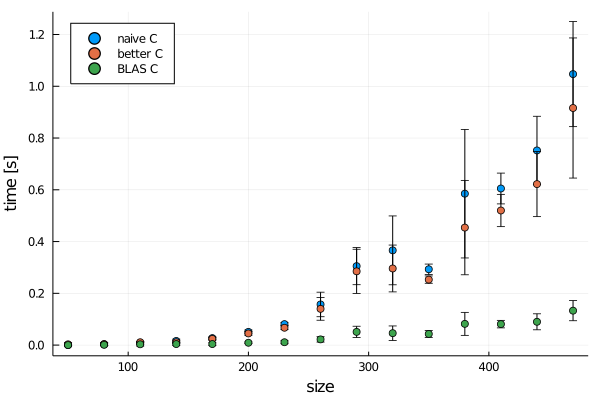

In [41]:
scatter(res_C_grouped.size, res_C_grouped.naive_mean, yerr=res_C_grouped.naive_std, label = "naive C", 
        xlabel = "size", ylabel = "time [s]", legend=:topleft)
scatter!(res_C_grouped.size, res_C_grouped.better_mean, yerr=res_C_grouped.better_std, label = "better C")
scatter!(res_C_grouped.size, res_C_grouped.BLAS_mean, yerr=res_C_grouped.BLAS_std, label ="BLAS C")

W języku C metoda naiwna również jest najwolniejsza, jednak różnice miedzy nią a ulepszoną są mniej zauważalne. Funkcja BLAS-owa znów wykazuje największą przewagę. 

### Dopasowanie wielomianów (zad 3.)

In [42]:
xs = Float64.(res_C_grouped[!, :size])
ys_naive = res_C_grouped[!, :naive_mean]
ys_better = res_C_grouped[!, :better_mean]
ys_BLAS = res_C_grouped[!, :BLAS_mean]

15-element Array{Float64,1}:
 0.0
 0.001
 0.003
 0.004
 0.004
 0.009
 0.011
 0.022
 0.051000000000000004
 0.046000000000000006
 0.043
 0.082
 0.08099999999999999
 0.09
 0.133

In [43]:
f_naive = fit(xs,ys_naive,3)

Polynomial(-0.009681858511052513 + 8.265433428832282e-5*x - 5.280697274161378e-7*x^2 + 1.0402894934485352e-8*x^3)

In [44]:
f_better = fit(xs, ys_better,3)

Polynomial(-0.030374099034993354 + 0.0005460764695241957*x - 2.7970271679422556e-6*x^2 + 1.1990329528455957e-8*x^3)

In [45]:
f_BLAS = fit(xs, ys_BLAS,3)

Polynomial(0.001947465912607497 - 5.695305662625869e-5*x + 4.0349568127345663e-7*x^2 + 5.694902209063459e-10*x^3)

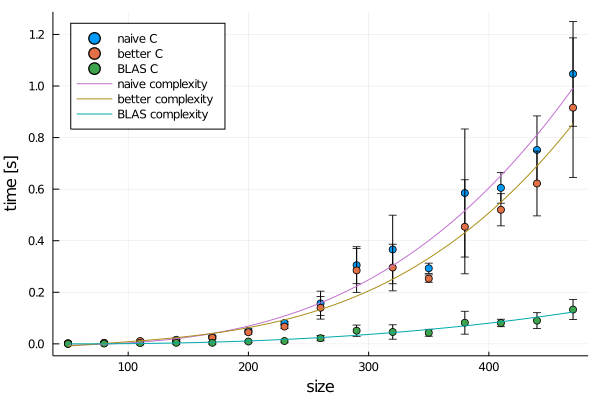

In [46]:
plot!(f_naive, extrema(xs)..., label = "naive complexity")
plot!(f_better, extrema(xs)..., label = "better complexity")
plot!(f_BLAS, extrema(xs)..., label = "BLAS complexity")

## Zad 3.

Użyć funkcji polyfit  z pakietu  Polynomials   do znalezienia odpowiednich wielomianów, ktore najlepiej pasują do zależności czasowych każdego z algorytmów. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianow do wczesniejszych  wykresów. (1 pkt)

#### Funkcje dodałam do wykresów w powyższych zadaniach.

## Zad 4.

Pokazać zniwelowanie efektu Rungego  poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Wymagany wykres. (1 pkt)

Efekt Rungego dla 11 równoodległych punktów należących do funkcji $f(x) = \frac{1}{1 + 12x^2}$:

In [47]:
function runge(x)
    return 1/(1+12x^2)
end

runge (generic function with 1 method)

In [48]:
xs = -1:0.2:1
ys = [runge(x) for x in xs]

f=fit(xs, ys)

Polynomial(1.0 - 4.440892098500626e-16*x - 10.30280928015986*x^2 + 61.533031481100956*x^4 + 3.552713678800501e-14*x^5 - 175.24433553458832*x^6 + 219.00612971750823*x^8 - 1.4210854715202004e-14*x^9 - 95.91509330693792*x^10)

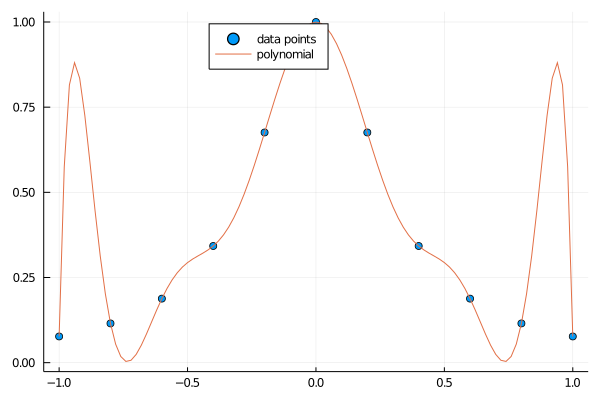

In [49]:
scatter(xs, ys, label = "data points", legend=:top)
plot!(f,  extrema(xs)..., label="polynomial")


Przy interpolacji wielomianowej często zamiast równoodległych węzłów, używa się węzłów Czebyszewa, leżących w zerach wielomianów Czebyszewa. Pozwala to uniknąć tak zwanego efektu Rungego, czyli dużych oscylacji wielomianu interpolacyjnego przy krańcach przedziału. Fakt, że miejsca zerowe wielomianów Czebyszewa zagęszczają się ku krańcom przedziału, pozwala lepiej związać wielomian zapobiegając naturalnym dla wielomianów wysokiego rzędu oscylacjom. (https://pl.wikipedia.org/wiki/Wielomiany_Czebyszewa)

In [50]:
# wielomian Czebyszewa

ch = ChebyshevT(f)

ChebyshevT(1.0⋅T_0(x) - 4.440892098500626e-16⋅T_1(x) - 10.30280928015986⋅T_2(x) + 61.533031481100956⋅T_4(x) + 3.552713678800501e-14⋅T_5(x) - 175.24433553458832⋅T_6(x) + 219.00612971750823⋅T_8(x) - 1.4210854715202004e-14⋅T_9(x) - 95.91509330693792⋅T_10(x))

In [51]:
# węzły Czebyszewa, leżące w zerach wielomianu Czebyszewa

roots = Polynomials.roots(ch)

ys2 = [runge(r) for r in roots]
f2=fit(roots, ys2)

Polynomial(0.7773995563100986 - 6.661338147750939e-16*x - 3.2117580980780076*x^2 + 1.2434497875801753e-14*x^3 + 5.996830918389335*x^4 - 1.554312234475219e-14*x^5 - 5.103602690330487*x^6 + 1.554312234475219e-14*x^7 + 1.6180510510955284*x^8 - 5.217623186581376e-15*x^9)

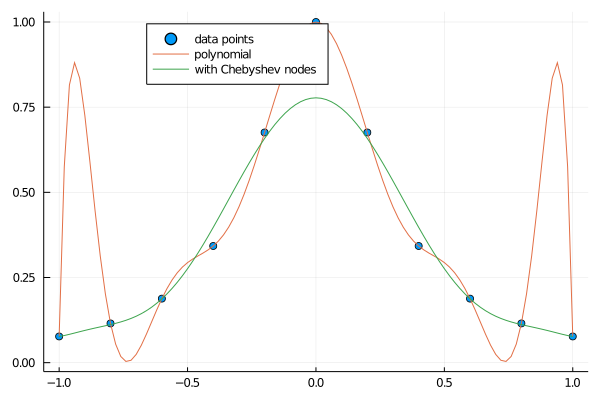

In [52]:
plot!(f2,  extrema(roots)..., label="with Chebyshev nodes")

## Zad 5.

Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ (1 pkt)

#### Weźmy dla przykładu funkcję daną wzorem $g(x) = \sqrt{\frac{1+\frac{x}{2}}{1 + 2x}}$, gdzie $x \in [0, 5]$

In [53]:
g(x) = sqrt((1 + x/2)/(1 + 2x))

g (generic function with 1 method)

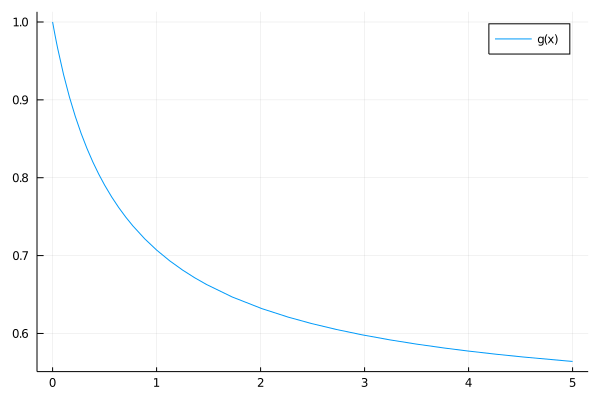

In [55]:
plot(g, 0, 5, label = "g(x)")

#### Rozwinięcie w szereg Taylora funkcji $g(x)$

In [56]:
taylor = Taylor1(Float64, 5)

 1.0 t + 𝒪(t⁶)

In [57]:
taylor_app = g(t)

 1.0 - 0.75 t + 1.21875 t² - 2.0859375 t³ + 3.69287109375 t⁴ - 6.6881103515625 t⁵ + 𝒪(t⁶)

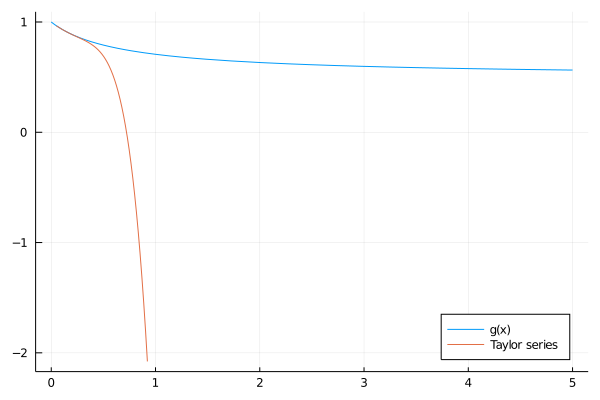

In [58]:
plot!(Polynomial(taylor_app.coeffs), label = "Taylor series", legend=:bottomright)

#### Przybliżenie Padé funkcji $g(x)$, gdzie $n=m=1$


In [59]:
pade_app = Polynomials.PolyCompat.PadeApproximation.Pade(Polynomial(taylor_app.coeffs), 1, 1)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64,Float64}(Polynomial(1.0 + 0.8749999999999998*x), Polynomial(1.0 + 1.6249999999999998*x), :x)

In [60]:
fieldnames(typeof(pade_app))

(:p, :q, :var)

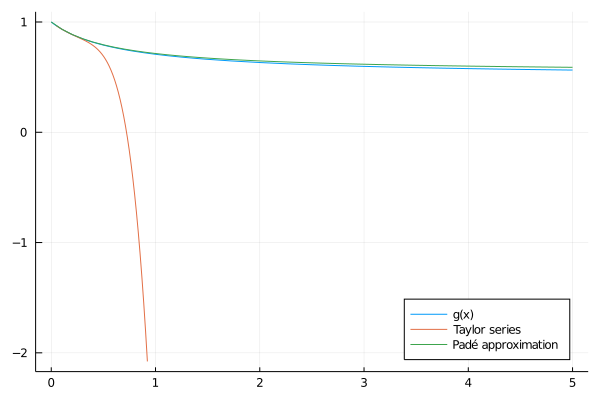

In [61]:
xs = 0:0.1:5
ys = [pade_app(x) for x in xs]

plot!(xs,ys,label = "Padé approximation")